<a href="https://colab.research.google.com/github/1powechri2/1804/blob/master/Copy_of_Updated_Attendee_Intro_to_Visualizations_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What makes buying a home in California so expensive?
- Throughout this notebook we will seek to answer that question using exploratory data analysis techniques and visualizations in Python.
- Anytime you see a line surrounded by triple asterisks, `***LIKE THIS***`, that is a line of code that you will need to replace or edit.
- Have fun and good luck coding!

___
### Import the California Housing dataset.

Keep in mind:
*   One block of homes per row
*   Values are from 1990, not 2019!




In [0]:
DATASETS_URL = "https://github.com/ageron/handson-ml/raw/master/datasets"
import os
import tarfile
from six.moves import urllib


HOUSING_PATH = "datasets/housing"
HOUSING_URL = DATASETS_URL + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()


### Quick EDA

Use the `.head()` function to look at the first 5 rows of data entries.


In [0]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Use `.shape` to return the size of your data set (rows, columns).

In [0]:
housing.shape

(20640, 10)

Use the `.describe()` function to see summary statisitcs on the numerical columns in the data set.

In [0]:
housing.describe

<bound method NDFrame.describe of        longitude  latitude  ...  median_house_value  ocean_proximity
0        -122.23     37.88  ...            452600.0         NEAR BAY
1        -122.22     37.86  ...            358500.0         NEAR BAY
2        -122.24     37.85  ...            352100.0         NEAR BAY
3        -122.25     37.85  ...            341300.0         NEAR BAY
4        -122.25     37.85  ...            342200.0         NEAR BAY
5        -122.25     37.85  ...            269700.0         NEAR BAY
6        -122.25     37.84  ...            299200.0         NEAR BAY
7        -122.25     37.84  ...            241400.0         NEAR BAY
8        -122.26     37.84  ...            226700.0         NEAR BAY
9        -122.25     37.84  ...            261100.0         NEAR BAY
10       -122.26     37.85  ...            281500.0         NEAR BAY
11       -122.26     37.85  ...            241800.0         NEAR BAY
12       -122.26     37.85  ...            213500.0         NEAR BAY


___
### Let's start using visualizations!

# Import packages that we need to explore and visualize our data.

In [0]:
# Import the appropriate packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default style to consider colorblind readers:
plt.style.use('seaborn-colorblind')

#### Visualizations for Ourselves
Let's start by plotting some basic graphs to answer questions about data.
We don't need to worry too much about making these aesthetically pleasing.

- What is the distribution of house values in our data set?
> To answer this, we'll use a **histogram**:

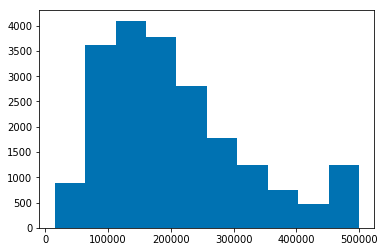

In [0]:
# Create histogram of median house values below:
# (the semicolon at the end suppresses the visualization object report)
plt.hist(housing["median_house_value"]);

- I know I said we don't need to worry _too much_ about aesthetics, but if you saw the above histogram without the associated code, you wouldn't know what it's conveying.
> Let's add some labels to fix that:

Text(0, 0.5, 'Number of Houses')

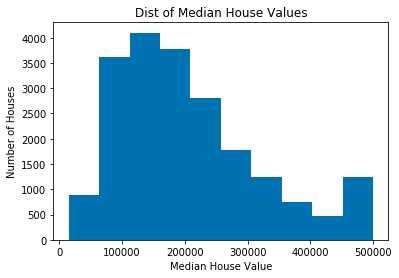

In [0]:
# First we create our plot:
plt.hist(housing['median_house_value'])

# Then we edit aspects of our plot object:
plt.title("Dist of Median House Values")
plt.xlabel("Median House Value")
plt.ylabel("Number of Houses")

- What about using our `ocean_proximity` column to quantify our house locations? How close to (or far from) the ocean are all of our houses located?
> We'll use `value_counts` and a **bar chart** to answer this:

In [0]:
# Generating the values we are using for the following plot:
housing['ocean_proximity'].value_counts()

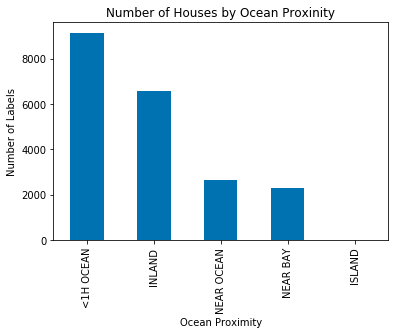

In [0]:
# Bar chart for those values here:
housing['ocean_proximity'].value_counts().plot(kind = 'bar')
plt.title("Number of Houses by Ocean Proxinity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Number of Labels");

- While plotting the value counts for `ocean_proximity` is nice for some initial EDA, it's not necessarily helping us answer more about our big overall question. Maybe we continue to build off of it and ask the following: what is the average median house value per each category in `ocean_proximity`?
> We'll use pandas `groupby` and a **bar chart** to answer this:

In [0]:
# Generating the values for the following plot using groupby:
housing.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)

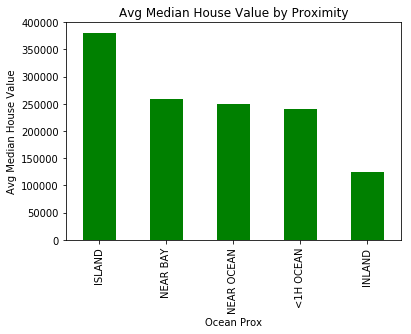

In [0]:
# Plotting those values here with bar chart:
housing.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False).plot(kind = 'bar',
                                                                                                  color = 'green')
plt.title("Avg Median House Value by Proximity")
plt.xlabel("Ocean Prox")
plt.ylabel("Avg Median House Value");

> _From this chart, it seems like houses located further inland are associated with a decrease in average median house value._

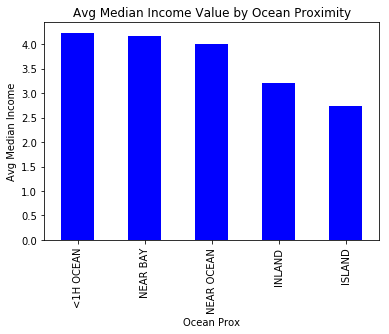

In [0]:
# CHALLENGE 1
# Use groupby and create another bar chart to show how a different continuous variable is related to ocean proximity:
# Don't forget to replace any relevant labels and titles!
housing.groupby('ocean_proximity')['median_income'].mean().sort_values(ascending=False).plot(kind = 'bar',
                                                                                                  color = 'blue')

plt.title("Avg Median Income Value by Ocean Proximity")
plt.xlabel("Ocean Prox")
plt.ylabel("Avg Median Income");

- Maybe we want to know if other aspects of our data are related in any meaningful way.

> - We might suspect that more income could likely mean a nicer home, so we could ask the following: are `median_income` and `median_house_value` positively correlated?
>> A **scatter plot** will help illuminate that for us:


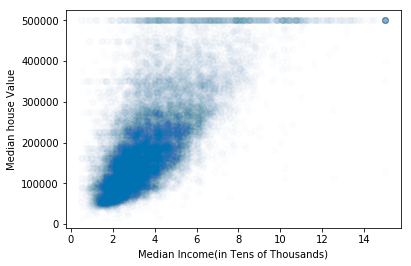

In [0]:
# Median income vs house value scatter here
plt.scatter(housing['median_income'], housing['median_house_value'], alpha = 0.01)
plt.xlabel("Median Income(in Tens of Thousands)")
plt.ylabel("Median house Value");

> _It looks like there is a positive correlation between income and house value._

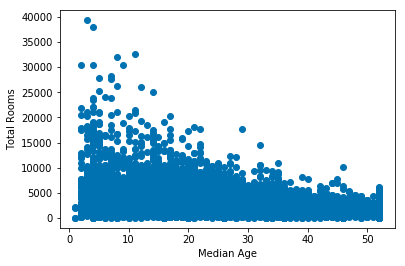

In [0]:
# CHALLENGE 2
# Use a scatter plot to show a different relationship between two continuous variables:
# Don't forget to replace any relevant labels and titles!
plt.scatter(housing['housing_median_age'], housing['total_rooms'])
plt.xlabel("Median Age")
plt.ylabel("Total Rooms");

- What if we don't want to look at individual scatterplots one at a time? Is there a way to look at multiple correlations at once?
> Yes! Pandas has a very helpful `.corr()` function that generates correlation values for all continuous variables with each other.

In [0]:
# Generating the values to visualize:
# (You can also check for how strong the correlation was for your scatter plot here!)
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


> We can visualize the results of this correlation matrix using Seaborn's **heatmap** visualization:

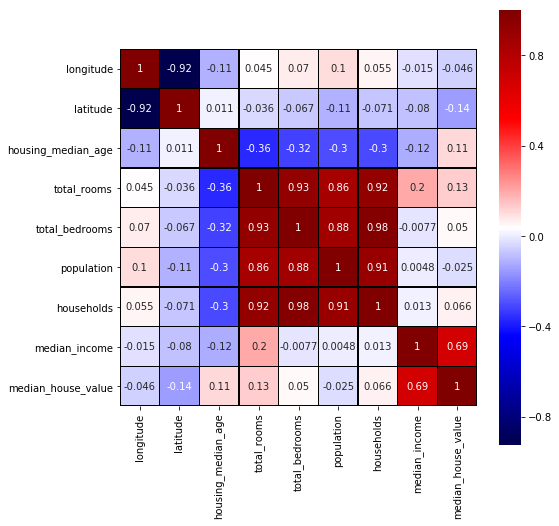

In [0]:
# Visualizing our correlation matrix with a heatmap:
plt.figure(figsize=(8,8))
sns.heatmap(housing.corr(),
            linewidths = 0.25,
            square = True,
            cmap = 'seismic',
            linecolor = 'black',
            annot= True);

> _We see strong positive correlations in dark red, strong negative correlations in dark blue, and weak associations approach the washed out white._

___
### Bringing It All Together

We've answered a lot of questions about our data, and have generated some very useful visualizations to help answer those questions. However, both aesthetically and functionally, the ones that we've created have fallen more into the "visualizations for ourselves" bucket.

Now that we have a deeper understanding of our dataset, let's switch gears and create one final visualization that is presentation-ready and aims to answer our big question that we started with: **What makes buying a home in California expensive?** We will want this one to display multiple aspects of our dataset at once and embody the use of visualization to tell a story about our data.

- Since we have `longitude` and `latitude` data, we can use a **scatter plot** to create a map of our data and then continually experiment with new parameters to get what we want:
> First change the size of the figure and then we'll set the `alpha` (or transparency) of our points to 40%.

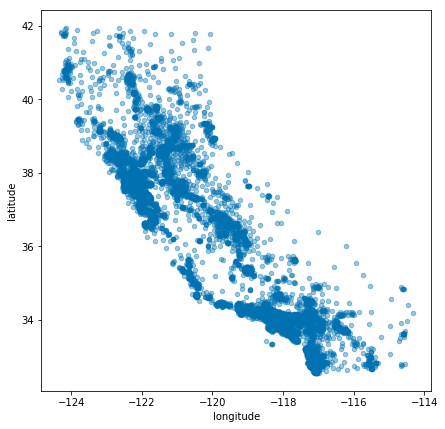

In [0]:
# Building out our final viz:
housing.plot(kind = "scatter",
             x = 'longitude',
             y = 'latitude',
             figsize = (7,7),
             alpha = 0.4);

- We know that we'll want to incorporate median income information into our viz, so let's do that here:
> Do this by changing the `s` (size) of each point proportional to the median income of the associated block and then adding a label so our audience knows what it's conveying.

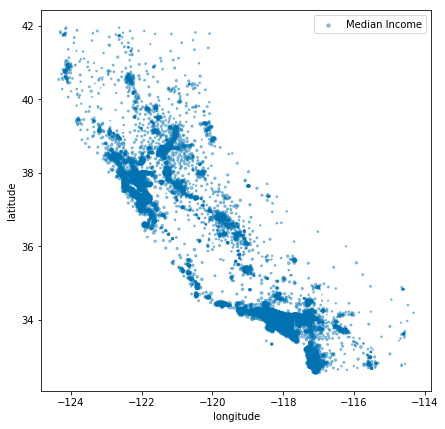

In [0]:
# Changing our point size:

housing.plot(kind = "scatter",
             x = 'longitude',
             y = 'latitude',
             figsize = (7,7),
             alpha = 0.4,
             s = housing['median_income']*1.5,
             label = 'Median Income');

- In our last piece of data artistry, we'll incorporate the actual median house values:
> Do this by changing the `c` (color) of each point proportional to the median house value of the associated block along the `cmap` (colormap) spectrum of "jet" and then adding a `colorbar` so our audience knows the range of those values. 

Now we have a _BEAUTIFUL_ piece of storytelling with data.

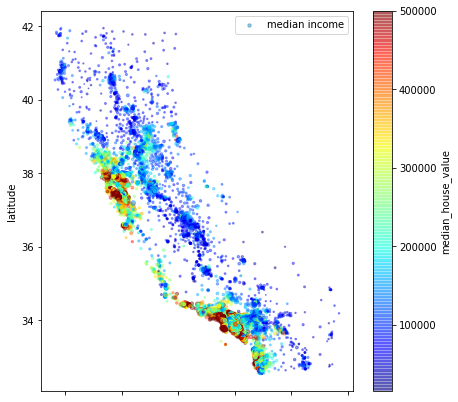

In [0]:
# Adding values using color:

housing.plot(kind = "scatter",
             x = 'longitude',
             y = 'latitude',
             figsize = (7,7),
             alpha = 0.4,
             s = housing['median_income']*1.5,
             label = 'median income',
             c = 'median_house_value',
             cmap = plt.get_cmap('jet'),
             colorbar = True);

#### To wrap it all up, we now have a plot that is showing that housing prices increase in areas of more concentrated wealth that are also closest to the coast and high density urban areas like San Francisco and Los Angeles.

#### Challenge
For added practice and to improve this last visualization, think about what other factors you could plot to continue to answer the big question, "What makes buying a home in California so expensive?".  

Suggestions of things to change/add:
- Change the column used to show the size (s) of the points (you might have to multiply or divide by a different value, and make sure to change the label too)
- Change the [color map](https://matplotlib.org/tutorials/colors/colormaps.html) to better convey the information
- Change the figure size (which number corresponds to width?)
- Change the alpha (values between 0 and 1)
- Look through the [matplotlib scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) docs to see what other parameters you can add/change to improve the plot (can you remove the axes?)